# CASE STUDY - performance monitoring

You will be building your own workflow template in this tutorial.  You already have a Dockerfile and a basic Flask application to build an API.  Lets combine what you have learned about logging to build a ``workflow-template`` that can be used to deploy models in a way that facilitates performance monitoring.

There are three main parts to this case study.

1. Write unit tests for a logger and a logging API endpoint
2. Add logging to your Docker container
3. Add an API endpoint for logging
4. Make sure all tests pass
5. Create model performance investigative tooling
6. Swap out the iris data for the AAVAIL churn data

You may want to eventually rename the directory because in this case-study you will swap out the iris data for `aavail-target.csv`.  It reality you will eventually want a library of workflow templates to work from and the naming convention you decide on can help with organization.  This notebook should reside in that source directory regardless of the name.  We suggest that you go through all of the tasks **first** using the iris data **then** copy the template to a new folder and make it work for the AAVAIL churn data.  Eventually you will want a suite of workflow templates that you will be able to select from.

In [21]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

%matplotlib inline

## Getting started

The ``workflow-template.zip`` is a workflow template.  Unpack the directory in a location where you would like the source code to exist.  Leaving out the ``static`` directory that contains css and JavaScript to render a landing page, the important pieces are shown in the following tree.

```
├── app.py
├── Dockerfile
├── model.py
├── README.rst
├── requirements.txt
├── run-tests.py
├── templates
│   ├── base.html
│   ├── dashboard.html
│   ├── index.html
│   └── running.html
└── unittests
    ├── ApiTests.py
    ├── __init__.py
    ├── ModelTests.py
```

If you plan on modifying the HTML website you will need to modify the files in ``templates``.  The rest of the files you should be familiar with at this point.


We will be working with an Flask API to interact with our model. In order to access the different endpoints of this API make sure the app is running. Open a new command prompt and run the app with the command :

```
python path/to/working/directory/app.py -d
```

## TASK 1: Write units test for a logger

1. Using `model.py` and `./unittests/ModelTests.py` as an example complete `logger.py` and 
`./unittests/LoggerTests.py`.
2. Modify the files so that there are at a minimum the following tests:

    * ensure predict log is automatically created
    * ensure train log is automatically created
    * ensure that content can be retrieved from predict log file
    * ensure that content can be retrieved from train log file
    
> IMPORTANT: when writing to a log file from a unit test you will want to ensure that you do not modify or delete existing 'production' logs.  You can test your function with the following code (although it is likely easier to work directly in a terminal).

In [9]:
!python ./unittests/LoggerTests.py

....
----------------------------------------------------------------------
Ran 4 tests in 0.030s

OK


The tests seem to be  working

## TASK 2: Add an API endpoint for logging

In addition to the `predict` and `train` endpoints, create a third endpoint that returns 
logs.  Remember that there are `train` and `predict` log files and that they are set up 
to create new files each month.  You will need to ensure that your endpoint can accommodate this and the best way to ensure this is to **first write the unit tests** then write the code.

Flask has several functions to help with the sending of files. One example is [send_from_directory](https://flask.palletsprojects.com/en/1.1.x/api/#flask.send_from_directory).

In [10]:
# The API is ready we can test it. We invite you to take a close look into the ApiTests.py script.
!python ./unittests/ApiTests.py

ssss
----------------------------------------------------------------------
Ran 4 tests in 0.000s

OK (skipped=4)


## TASK 3: Make sure all tests pass

You have been working on specific suites of unit tests.  It is a best practice to double-check that all tests pass after making major changes like the ones you have just completed.

> make sure you modify the `./unittests/__init__.py` so that the LoggerTest suite is also included when running all tests.

In [11]:
!python run-tests.py

... saving model: models\model-0_1.joblib


ssss...
----------------------------------------------------------------------
Ran 7 tests in 0.120s

OK (skipped=4)


## TASK 4: Create model performance investigative tooling

There are a lot of convenience functions you could create here.  Create them directly in this notebook or create them as scripts that you may call from this notebook.  

First write a script that accomplishes the following:

* train one model, then select another type of machine learning model and train again,  ensuring that each has separate version numbers.
* simulate a couple of hundred predictions for each model.

At minimum create a tablular summary and/or a simple plot that accomplishes the following:

1. Compare model performance for the two models
2. Determine if there was any drift from the first model to the second using a novelty detection algorithm.

***Hint :*** The API has been built such that only dictionaries can be sent as query for the model. After training the model with the following command line :
```
python run-model-train.py
```
you will need to transtype your data into dictionaries in order to be able to call the predict endpoint of the API :
```
X_query_pd = pd.DataFrame([[5.1, 3.2], [10, 2.3]])
request_json = {'query':X_query_pd.to_dict(), 'type':'dict'}
port = 8080
r = requests.post('http://127.0.0.1:{}/predict'.format(port), json=request_json)
print(r.text)
```
You can of course tweak the API (directly in app.py) to accept more data types.

In [4]:
import data_ingestion as di

In [5]:
data = di.train_data()
data

,customer_id,is_subscriber,country,age,customer_name,subscriber_type,num_streams
0,1,1,united_states,21,Kasen Todd,aavail_premium,23
1,2,0,singapore,30,Ensley Garza,aavail_unlimited,12
2,3,0,united_states,21,Lillian Carey,aavail_premium,22
3,4,1,united_states,20,Beau Christensen,aavail_basic,19
4,5,1,singapore,21,Ernesto Gibson,aavail_premium,23
...,...,...,...,...,...,...,...
995,996,0,singapore,-46,Peyton Enriquez,aavail_unlimited,14
996,997,1,united_states,23,Amina Manning,aavail_basic,24
997,998,1,united_states,24,Brooks Ventura,aavail_unlimited,17
998,999,1,united_states,39,Nayeli Mathis,aavail_unlimited,16


The data ingestion module retrieves the data

In [7]:
import eda

C:\Users\Nidhal\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Here we can compare the ditributions of the users' ages and nb of streams

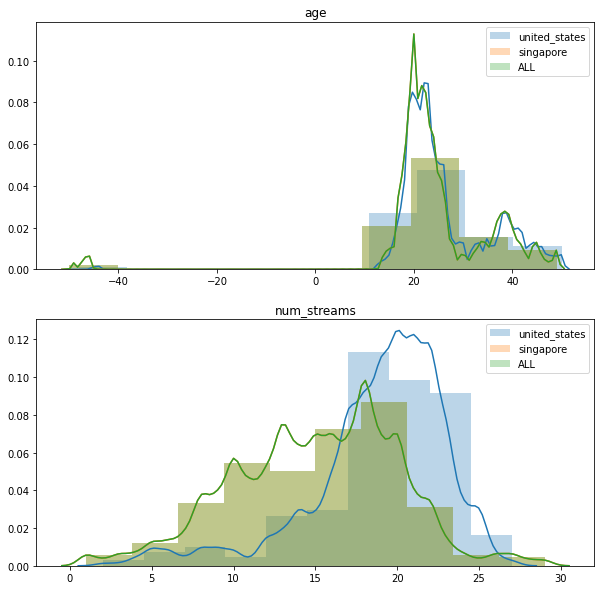

In [8]:
eda.plotCompareDistrubutions(data=data, over="country", to_compare=["united_states", "singapore"], dist_of=["age", "num_streams"])

The users seem to be all aroud 20 years old, regardless of their locations, however, the American users tend to have significantly more streams than all other users

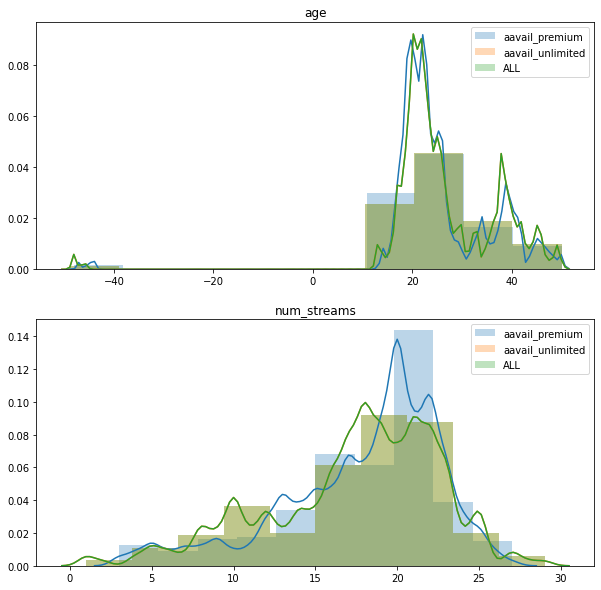

In [9]:
eda.plotCompareDistrubutions(data=data, over="subscriber_type", to_compare=["aavail_premium", "aavail_unlimited"], dist_of=["age", "num_streams"])

The premium users tend to be a few years older than the unlimited subscribers

In [22]:
import model as m

here we can compare a few algorithms

In [2]:
m.model_train()

Support Vector Machine will be used per default
... saving model: models\model-0_1.joblib
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.807407   0.683333  0.784848    0.745370      0.772441
recall       0.919831   0.440860  0.784848    0.680346      0.784848
f1-score     0.859961   0.535948  0.784848    0.697954      0.768648
support    237.000000  93.000000  0.784848  330.000000    330.000000


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [4]:
clf = DecisionTreeClassifier()
m.model_train(clf)

... saving model: models\model-0_1.joblib
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.764940   0.430380  0.684848    0.597660      0.670655
recall       0.810127   0.365591  0.684848    0.587859      0.684848
f1-score     0.786885   0.395349  0.684848    0.591117      0.676543
support    237.000000  93.000000  0.684848  330.000000    330.000000


In [5]:
clf = RandomForestClassifier()
m.model_train(clf)

... saving model: models\model-0_1.joblib
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.780392   0.493333  0.715152    0.636863      0.699494
recall       0.839662   0.397849  0.715152    0.618756      0.715152
f1-score     0.808943   0.440476  0.715152    0.624710      0.705102
support    237.000000  93.000000  0.715152  330.000000    330.000000


C:\Users\Nidhal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [6]:
clf = GradientBoostingClassifier()
m.model_train(clf)

... saving model: models\model-0_1.joblib
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.810078   0.611111  0.766667    0.710594      0.754005
recall       0.881857   0.473118  0.766667    0.677487      0.766667
f1-score     0.844444   0.533333  0.766667    0.688889      0.756768
support    237.000000  93.000000  0.766667  330.000000    330.000000


In [7]:
clf = AdaBoostClassifier()
m.model_train(clf)

... saving model: models\model-0_1.joblib
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.825397   0.628205  0.778788    0.726801      0.769825
recall       0.877637   0.526882  0.778788    0.702259      0.778788
f1-score     0.850716   0.573099  0.778788    0.711908      0.772478
support    237.000000  93.000000  0.778788  330.000000    330.000000


In [80]:
X,y = m.fetch_data()

In [106]:
N = 20
indices = np.random.randint(low = 0, high = X.shape[0], size = N)

Xs = X.iloc[indices]
ys = y[indices]

In [109]:
Xs.tail()

,country,age,subscriber_type,num_streams
705,united_states,22,aavail_premium,22
23,singapore,23,aavail_basic,14
54,united_states,25,aavail_basic,18
163,united_states,23,aavail_premium,20
538,singapore,23,aavail_unlimited,8


In [110]:
import requests
from ast import literal_eval
from collections import Counter
from datetime import date

In [111]:
port = 8080
r = requests.get('http://localhost:{}/'.format(port))
print(r)

<Response [200]>


In [112]:
request_json = {'query':Xs.to_dict(),'type':'dict'}
port = 8080
r = requests.post('http://localhost:{}/predict'.format(port),json=request_json)

In [113]:
y_hat =  literal_eval(r.text)

In [114]:
Xs["Actual"] = ys
Xs["Predicted"] = y_hat["y_pred"]

C:\Users\Nidhal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Nidhal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [115]:
Xs

,country,age,subscriber_type,num_streams,Actual,Predicted
382,united_states,21,aavail_basic,20,0.0,0.0
526,united_states,25,aavail_basic,17,0.0,0.0
279,united_states,35,aavail_unlimited,14,0.0,0.0
124,united_states,31,aavail_basic,16,1.0,0.0
66,united_states,23,aavail_basic,21,0.0,0.0
325,united_states,34,aavail_premium,12,0.0,0.0
895,singapore,24,aavail_basic,19,1.0,1.0
647,united_states,33,aavail_premium,22,1.0,0.0
35,singapore,33,aavail_premium,26,1.0,1.0
216,singapore,25,aavail_unlimited,17,1.0,1.0


The API retrieves the preditictios as expected, we notice that, indeed, the class 0 tends to be predicted more efficiently